In [2]:
import ta
from ta import add_all_ta_features
from ta.utils import dropna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('aapl_1m_train.csv')

In [4]:
data.head(2)

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume
0,0,1672736400,0,2023-01-03 09:00:00,130.28,131.00,130.28,131.0,8174
1,1,1672736460,0,2023-01-03 09:01:00,130.87,131.17,130.87,131.1,8820


In [26]:
class Operation:
    def __init__(self, operation_type, bought_at, timestamp, 
                 n_shares, stop_loss, take_profit):
        self.operation_type = operation_type
        self.bought_at = bought_at
        self.timestamp = timestamp
        self.n_shares = n_shares
        self.sold_at = None
        self.stop_loss = stop_loss
        self.take_profit = take_profit

In [6]:
cash = 1000000
active_operations = []
com = 0.00125
strategy_value = [1000000]

for i, row in data.iterrows():

    # Close opearations
    temp_operations= []
    for op in active_operations:
        # Close losing positions
        if op.stop_loss > row.Close:
            cash += row.Close * (1 - com)

        # Close profit
        elif op.take_profit < row.Close: 
            cash += row.Close * (1 - com)

        else:
            temp_operations.append(op)

    active_operations = temp_operations

    # Do we have enough cash?
    if cash > row.Close * (1 + com):

        # buy signal
        if row.Close > row.Open:
            active_operations.append(Operation(operation_type="long",
                                            bought_at=row.Close,
                                                timestamp= row.Timestamp, 
                                                n_shares=1,
                                                stop_loss=row.Close * 0.95,
                                                take_profit=row.Close * 1.05))
            
            cash -= row.Close * (1 + com)

    # Calculate open positions value
    total_value = len(active_operations) * row.Close
    strategy_value.append(cash + total_value)

    


In [7]:
1_000_000

1000000

<function matplotlib.pyplot.show(close=None, block=None)>

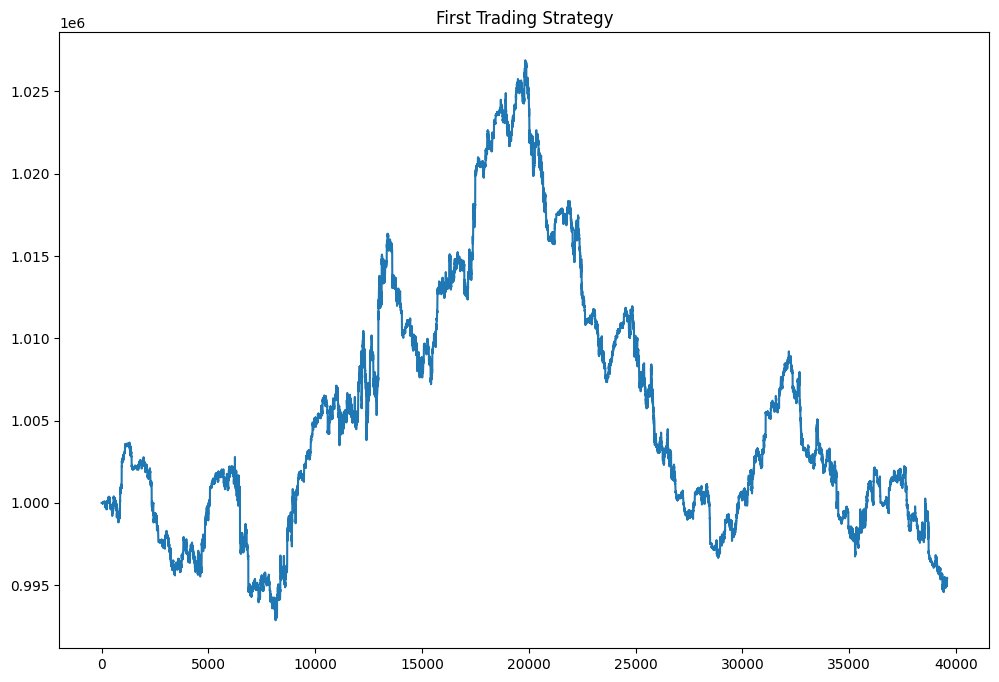

In [8]:
plt.figure(figsize=(12,8))
plt.plot(strategy_value)
plt.title("First Trading Strategy")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

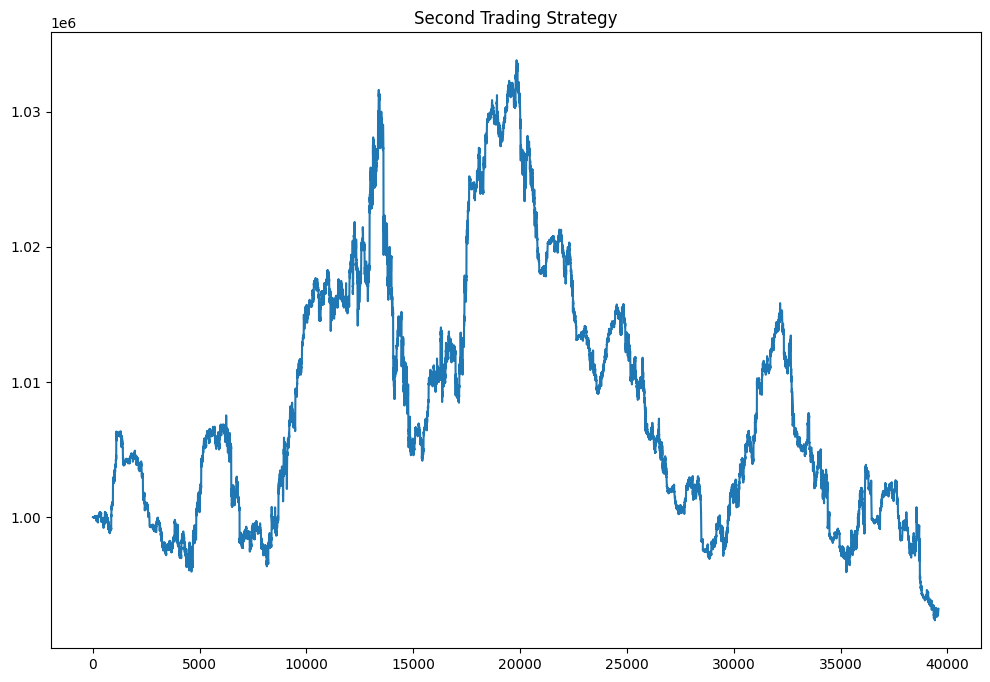

In [9]:
cash = 1000000
active_operations = []
com = 0.00125
strategy_value = [1000000]

for i, row in data.iterrows():

    # Close opearations
    temp_operations= []
    for op in active_operations:
        # Close losing positions
        if op.stop_loss > row.Close:
            cash += row.Close * (1 - com)

        # Close profit
        elif op.take_profit < row.Close: 
            cash += row.Close * (1 - com)

        else:
            temp_operations.append(op)

    active_operations = temp_operations

    # Do we have enough cash?
    if cash > row.Close * (1 + com):

        # buy signal
        if row.Close > row.Open:
            active_operations.append(Operation(operation_type="long",
                                            bought_at=row.Close,
                                                timestamp= row.Timestamp, 
                                                n_shares=2,
                                                stop_loss=row.Close * 0.95,
                                                take_profit=row.Close * 1.08))
            
            cash -= row.Close * (1 + com)

    # Calculate open positions value
    total_value = len(active_operations) * row.Close
    strategy_value.append(cash + total_value)

    
plt.figure(figsize=(12,8))
plt.plot(strategy_value)
plt.title("Second Trading Strategy")
plt.show


In [10]:
data

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume
0,0,1609770600,0,2021-01-04 14:30:00,133.570007,133.611602,132.389999,132.809997,6624663.0
1,1,1609770900,0,2021-01-04 14:35:00,132.750000,132.750000,131.809997,131.889999,2541553.0
2,2,1609771200,0,2021-01-04 14:40:00,131.500000,132.339996,131.500000,132.059997,2492415.0
3,3,1609771500,0,2021-01-04 14:45:00,132.000000,132.250000,131.899993,132.250000,1859131.0
4,4,1609771800,0,2021-01-04 14:50:00,132.000000,132.018096,131.520004,131.589996,1780105.0
...,...,...,...,...,...,...,...,...,...
39574,19788,1672432800,0,2022-12-30 20:40:00,129.029998,129.130004,128.919998,129.054992,833767.0
39575,19789,1672433100,0,2022-12-30 20:45:00,129.059997,129.399993,129.020004,129.380004,2136910.0
39576,19790,1672433400,0,2022-12-30 20:50:00,129.375000,129.929992,129.330001,129.764404,2879267.0
39577,19791,1672433700,0,2022-12-30 20:55:00,129.764999,129.949996,129.619995,129.949996,3896812.0


In [31]:
rsi_data = ta.momentum.RSIIndicator(close=data['Close'], window=14)

In [32]:
data['RSI'] = rsi_data.rsi()
data = data.dropna()
data.head()

C:\Users\joalf\AppData\Local\Temp\ipykernel_38440\2899309186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = rsi_data.rsi()


,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume,RSI
26,26,1609778400,0,2021-01-04 16:40:00,129.679992,129.679992,129.270004,129.390106,1729037.0,22.033270
27,27,1609778700,0,2021-01-04 16:45:00,129.399993,129.585006,129.329299,129.413299,1180904.0,22.940845
28,28,1609779000,0,2021-01-04 16:50:00,129.410003,129.529998,129.110000,129.148498,1457144.0,20.068507
29,29,1609779300,0,2021-01-04 16:55:00,129.130004,129.179992,128.789993,128.820007,2439704.0,17.192706
30,30,1609779600,0,2021-01-04 17:00:00,128.809997,128.919296,128.399993,128.580001,2340696.0,15.450608


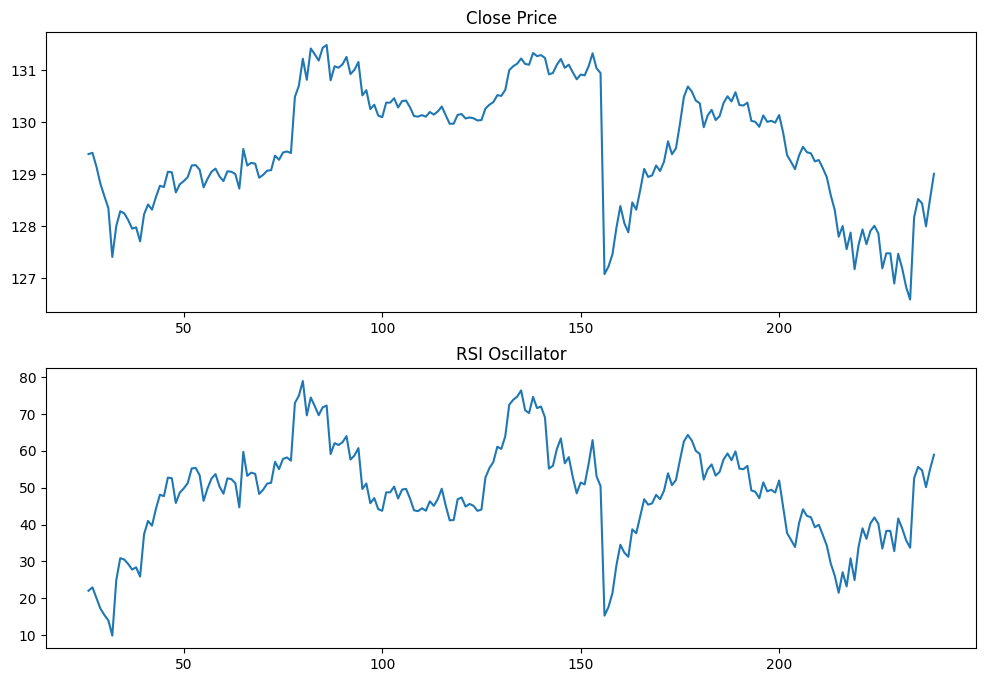

In [34]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot the closing price on the first subplot
axs[0].plot(data['Close'][:214])
axs[0].set_title('Close Price')

# Plot the RSI on the second subplot
axs[1].plot(data['RSI'][:214])
axs[1].set_title('RSI Oscillator')

# Display the plot
plt.show()

In [47]:
cash = 1000000
active_operations = []
com = 0.00125
strategy_value = [1000000]
n_shares = 5

lost_ope = 0

for i, row in data.iterrows():

    # Close opearations
    temp_operations= []
    for op in active_operations:
        # Close losing positions
        if op.stop_loss > row.Close:
            cash += row.Close * op.n_shares * (1 - com)

        # Close profit
        elif op.take_profit < row.Close: 
            cash += row.Close * op.n_shares * (1 - com)

        else:
            temp_operations.append(op)

    active_operations = temp_operations

    # Do we have enough cash?
    if cash > row.Close * op.n_shares * (1 + com):

        # buy signal, if RSI < 30
        if row.RSI < 25:
            active_operations.append(Operation(operation_type="long",
                                            bought_at=row.Close,
                                                timestamp= row.Timestamp, 
                                                n_shares=n_shares,
                                                stop_loss=row.Close * 0.95,
                                                take_profit=row.Close * 1.07))
            
            cash -= row.Close * op.n_shares * (1 + com)
        else:
            lost_ope += 1

    # Calculate open positions value
    total_value = len(active_operations) * row.Close * op.n_shares
    strategy_value.append(cash + total_value)



NO MONEY 1
NO MONEY 2
NO MONEY 3
NO MONEY 4
NO MONEY 5
NO MONEY 6
NO MONEY 7
NO MONEY 8
NO MONEY 9
NO MONEY 10
NO MONEY 11
NO MONEY 12
NO MONEY 13
NO MONEY 14
NO MONEY 15
NO MONEY 16
NO MONEY 17
NO MONEY 18
NO MONEY 19
NO MONEY 20
NO MONEY 21
NO MONEY 22
NO MONEY 23
NO MONEY 24
NO MONEY 25
NO MONEY 26
NO MONEY 27
NO MONEY 28
NO MONEY 29
NO MONEY 30
NO MONEY 31
NO MONEY 32
NO MONEY 33
NO MONEY 34
NO MONEY 35
NO MONEY 36
NO MONEY 37
NO MONEY 38
NO MONEY 39
NO MONEY 40
NO MONEY 41
NO MONEY 42
NO MONEY 43
NO MONEY 44
NO MONEY 45
NO MONEY 46
NO MONEY 47
NO MONEY 48
NO MONEY 49
NO MONEY 50
NO MONEY 51
NO MONEY 52
NO MONEY 53
NO MONEY 54
NO MONEY 55
NO MONEY 56
NO MONEY 57
NO MONEY 58
NO MONEY 59
NO MONEY 60
NO MONEY 61
NO MONEY 62
NO MONEY 63
NO MONEY 64
NO MONEY 65
NO MONEY 66
NO MONEY 67
NO MONEY 68
NO MONEY 69
NO MONEY 70
NO MONEY 71
NO MONEY 72
NO MONEY 73
NO MONEY 74
NO MONEY 75
NO MONEY 76
NO MONEY 77
NO MONEY 78
NO MONEY 79
NO MONEY 80
NO MONEY 81
NO MONEY 82
NO MONEY 83
NO MONEY 84
N

<function matplotlib.pyplot.show(close=None, block=None)>

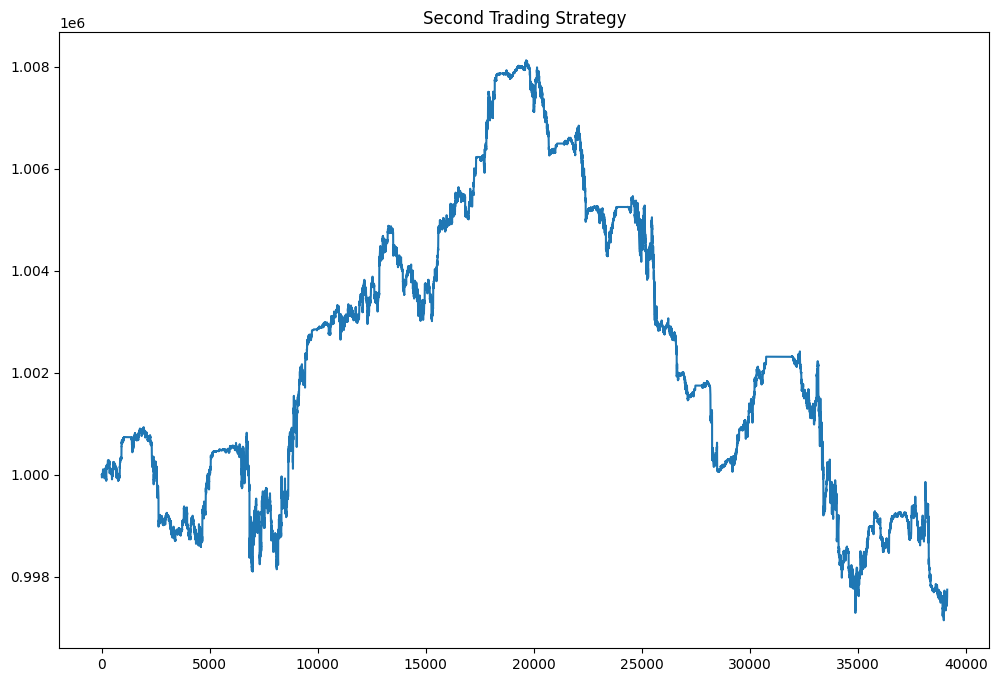

In [48]:
plt.figure(figsize=(12,8))
plt.plot(strategy_value)
plt.title("Second Trading Strategy")
plt.show

## SMA Strategy

In [49]:
short_ma = ta.trend.SMAIndicator(data.Close, window=5)
long_ma = ta.trend.SMAIndicator(data.Close, window=21)

In [69]:
data['SHORT_SMA'] = short_ma.sma_indicator()
data['LONG_SMA'] = long_ma.sma_indicator()
data = data.dropna()
data.head()

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume,RSI,SHORT_MA,LONG_MA,SHORT_SMA,LONG_SMA
46,46,1609784400,0,2021-01-04 18:20:00,128.750106,129.070007,128.720001,129.050003,1210041.0,52.743505,128.694003,128.454463,128.694003,128.454463
47,47,1609784700,0,2021-01-04 18:25:00,129.044998,129.110000,128.900604,129.039794,1123076.0,52.554311,128.837960,128.437781,128.837960,128.437781
48,48,1609785000,0,2021-01-04 18:30:00,129.039993,129.059997,128.595001,128.652999,974564.0,45.844504,128.855560,128.401576,128.855560,128.401576
49,49,1609785300,0,2021-01-04 18:35:00,128.654998,128.979995,128.639999,128.807601,931027.0,48.665669,128.861080,128.385343,128.861080,128.385343
50,50,1609785600,0,2021-01-04 18:40:00,128.820007,129.009994,128.800003,128.869995,753250.0,49.802205,128.884078,128.387723,128.884078,128.387723


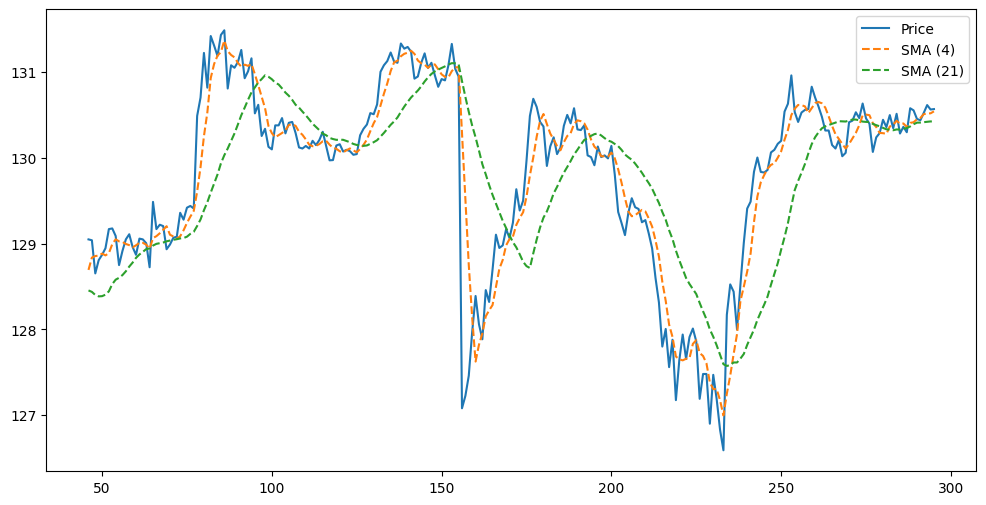

In [71]:
plt.figure(figsize=(12,6))
plt.plot(data.Close[:250], label = "Price")
plt.plot(data.SHORT_SMA[:250], label = "SMA (4)", linestyle="--")
plt.plot(data.LONG_SMA[:250], label = "SMA (21)", linestyle="--")
plt.legend()
plt.show()


In [81]:
cash = 1000000
active_operations = []
com = 0.00125
strategy_value = [1000000]
n_shares = 40

sma_sell_signa = data.iloc[0].LONG_SMA > data.iloc[0].SHORT_SMA 
sma_buy_signa = data.iloc[0].LONG_SMA < data.iloc[0].SHORT_SMA 

lost_ope = 0

for i, row in data.iterrows():

    # Close opearations
    temp_operations= []
    for op in active_operations:
        # Close losing positions
        if op.stop_loss > row.Close:
            cash += row.Close * op.n_shares * (1 - com)

        # Close profit
        elif op.take_profit < row.Close: 
            cash += row.Close * op.n_shares * (1 - com)

        else:
            temp_operations.append(op)

    active_operations = temp_operations

    # Do we have enough cash?
    if cash > row.Close * op.n_shares * (1 + com):
        # See if buy signal has changed...
        if (row.LONG_SMA < row.SHORT_SMA) and (sma_buy_signa == False):# and (row.RSI < 30) :
            sma_buy_signa = True

            active_operations.append(Operation(operation_type="long",
                                            bought_at=row.Close,
                                                timestamp= row.Timestamp, 
                                                n_shares=n_shares,
                                                stop_loss=row.Close * 0.95,
                                                take_profit=row.Close * 1.05))
            
            cash -= row.Close * op.n_shares * (1 + com)

        elif row.LONG_SMA > row.SHORT_SMA:
            sma_buy_signa = False
        

        # # buy signal, if RSI < 30
        # if row.RSI < 25:
        #     active_operations.append(Operation(operation_type="long",
        #                                     bought_at=row.Close,
        #                                         timestamp= row.Timestamp, 
        #                                         n_shares=n_shares,
        #                                         stop_loss=row.Close * 0.95,
        #                                         take_profit=row.Close * 1.05))
            
        #     cash -= row.Close * op.n_shares * (1 + com)
        # else:
            lost_ope += 1

    # Calculate open positions value
    total_value = len(active_operations) * row.Close * op.n_shares
    strategy_value.append(cash + total_value)

print(f'NO MONEY {lost_ope}')


NO MONEY 19174


<function matplotlib.pyplot.show(close=None, block=None)>

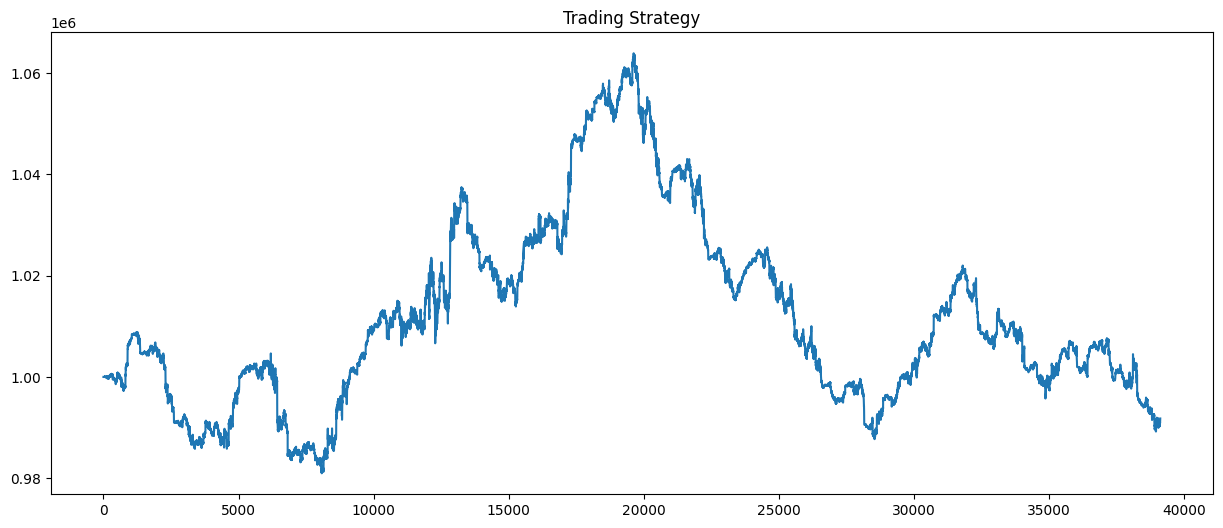

In [82]:
plt.figure(figsize=(15,6))
plt.plot(strategy_value)
plt.title("Trading Strategy")
plt.show